In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [2]:
gl = pd.read_excel("GL.xlsx")
gl

,Posting Date,Due Date,Series,Doc. No.,Trans. No.,Remarks,Offset Acct,Offset Acct Name,Debit (LC) (currency),Debit (LC),Credit (LC) (currency),Credit (LC),Cumulative Balance (LC) (currency),Cumulative Balance (LC),Licensor,Blanket Agreement,Seq. No.
0,Assets,132000,NaN,NaN,NaN,Finished Product,NaN,NaN,NaN,NaN,NaN,NaN,AED,0.00,NaN,NaN,NaN
1,01/06/2019,01/06/2019,Primary,PD 1,1.0,Goods Receipt PO - 90001475,208040.0,Goods Received Not Invoiced (GRNI) Clearing,AED,180.96,NaN,NaN,AED,180.96,NaN,NaN,NaN
2,01/06/2019,01/06/2019,Primary,DN 3200001,2.0,Deliveries - 102104,500005.0,COSales - Finished Items - IC,NaN,NaN,AED,161.13,AED,19.83,NaN,NaN,NaN
3,01/06/2019,01/06/2019,Primary,DN 3200002,3.0,Deliveries - 102223,500005.0,COSales - Finished Items - IC,NaN,NaN,AED,19.83,AED,0.00,NaN,NaN,NaN
4,01/06/2019,01/06/2019,Primary,PD 2,4.0,Goods Receipt PO - 90001475,208040.0,Goods Received Not Invoiced (GRNI) Clearing,AED,381.63,NaN,NaN,AED,381.63,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58689,31/07/2019,31/07/2019,Primary,PU 237,13807.0,VAT Code adj July_IN14toIN 10&11,90008448.0,Misc. Vendors Liabilities,AED,0.00,NaN,NaN,AED,9.00,NaN,NaN,NaN
58690,31/07/2019,31/07/2019,Primary,PU 240,13829.0,VAT Code adj July,90008609.0,ATL Global Cargo LLC,AED,-49.50,NaN,NaN,AED,-40.50,NaN,NaN,NaN
58691,31/08/2019,31/08/2019,Primary,JE 12970,12970.0,Hassan-Bills-31.07.19 (AED 318.50),610035.0,Debited costs - Sundry Office Expenses,NaN,NaN,AED,70.00,AED,-110.50,NaN,NaN,NaN
58692,31/08/2019,31/08/2019,Primary,PU 235,13777.0,VAt Code adj Aug,90008448.0,Misc. Vendors Liabilities,AED,0.00,NaN,NaN,AED,-110.50,NaN,NaN,NaN


In [3]:
gl.columns
# 0->pd,1->dd and 13->Cb

Index(['Posting Date', 'Due Date', 'Series', 'Doc. No.', 'Trans. No.',
       'Remarks', 'Offset Acct', 'Offset Acct Name', 'Debit (LC) (currency)',
       'Debit (LC)', 'Credit (LC) (currency)', 'Credit (LC)',
       'Cumulative Balance (LC) (currency)', 'Cumulative Balance (LC)',
       'Licensor', 'Blanket Agreement', 'Seq. No.'],
      dtype='object')

In [4]:
main_data = gl.iloc[:,[0,1,13]]
main_data

,Posting Date,Due Date,Cumulative Balance (LC)
0,Assets,132000,0.00
1,01/06/2019,01/06/2019,180.96
2,01/06/2019,01/06/2019,19.83
3,01/06/2019,01/06/2019,0.00
4,01/06/2019,01/06/2019,381.63
...,...,...,...
58689,31/07/2019,31/07/2019,9.00
58690,31/07/2019,31/07/2019,-40.50
58691,31/08/2019,31/08/2019,-110.50
58692,31/08/2019,31/08/2019,-110.50


In [5]:
main_data = main_data[main_data["Posting Date"].notnull() == True] # isnull bhi istamal krskta hn

In [6]:
pattern = "[0-9][0-9]/[0-9][0-9]/2[0-9][0-9][0-9]"
assets_type = main_data["Posting Date"][ main_data["Posting Date"].str.contains(pattern) == False].unique()
assets_type

array(['Assets', 'Liabilities', 'Capital and Reserves', 'Turnover',
       'Cost of Sales', 'Operating Costs', 'Non-Operating Income and'],
      dtype=object)

In [7]:
# the beautiful Approach
assets_balance = {}
temp = ""
for i in np.array(main_data):
    date = i[0]
    cb = i[2]
    
    if date in assets_type:
        temp = date
    
    
    elif temp not in assets_balance:
        assets_balance[temp] = cb
        
        
    elif temp in assets_balance:
        assets_balance[temp] += cb
        
        
assets_balance

{'Assets': 77441681125.96037,
 'Liabilities': -12291555920.378998,
 'Capital and Reserves': -14111567127.689993,
 'Turnover': -54842827227.54987,
 'Cost of Sales': 31163293462.580044,
 'Operating Costs': 176727923.5199996,
 'Non-Operating Income and': -406.0}

In [8]:
total = main_data["Cumulative Balance (LC)"].sum()
assets_balance["All"] = total
assets_balance

{'Assets': 77441681125.96037,
 'Liabilities': -12291555920.378998,
 'Capital and Reserves': -14111567127.689993,
 'Turnover': -54842827227.54987,
 'Cost of Sales': 31163293462.580044,
 'Operating Costs': 176727923.5199996,
 'Non-Operating Income and': -406.0,
 'All': 27535751830.440006}

In [9]:
types_balance = pd.DataFrame(list(assets_balance.values()), list(assets_balance.keys()))
types_balance.columns = ["Commulative Balance"] 
types_balance.index.name = "Type"

In [10]:
types_balance

,Commulative Balance
Type,
Assets,7.744168e+10
Liabilities,-1.229156e+10
Capital and Reserves,-1.411157e+10
Turnover,-5.484283e+10
Cost of Sales,3.116329e+10
Operating Costs,1.767279e+08
Non-Operating Income and,-4.060000e+02
All,2.753575e+10


### Visualization Of "types_balance"

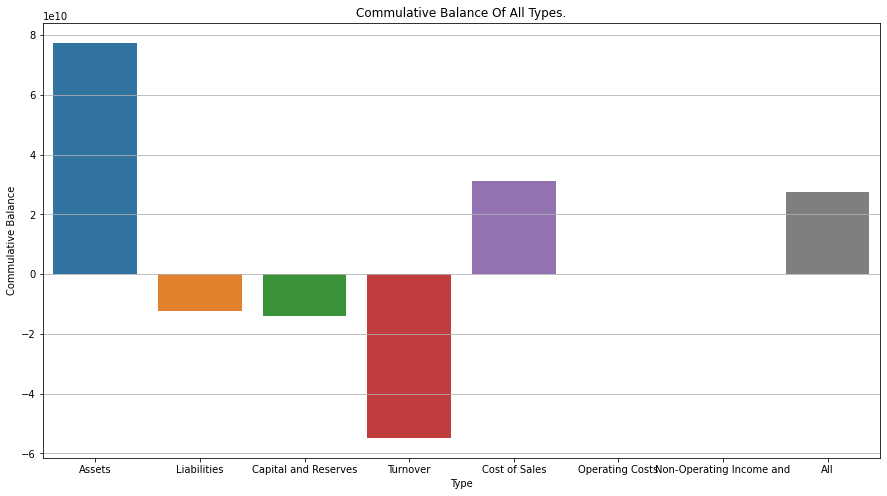

In [11]:
plt.figure(figsize=(15,8))
plt.grid()
sns.barplot(data = types_balance ,x= types_balance.index[:] , 
             y="Commulative Balance").set(title='Commulative Balance Of All Types.')
plt.show()

### Sub_Types_Balance

In [12]:
concat = []
for i in np.array(main_data):
    pos = i[0]
    due = i[1]

    concat.append(str(pos) +" "+str(due) )

concat

['Assets 132000',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2019',
 '01/06/2019 01/06/2

In [13]:
main_data.insert(2,"Head",concat)
main_data["Head"].unique()

array(['Assets 132000', '01/06/2019 01/06/2019', '01/06/2019 02/06/2019',
       ..., 'Operating Costs 630150', 'Operating Costs 660000',
       'Non-Operating Income and 700005'], dtype=object)

In [14]:
hn = main_data["Head"][main_data["Head"].str.contains(r"[a-z]+")]
hn

0                          Assets 132000
11814                      Assets 140000
21308                      Assets 140030
21697                      Assets 140032
21719                      Assets 140060
                      ...               
58616             Operating Costs 630020
58619             Operating Costs 630100
58667             Operating Costs 630150
58673             Operating Costs 660000
58683    Non-Operating Income and 700005
Name: Head, Length: 91, dtype: object

In [15]:
arr = []
temp = ""
for i in main_data["Head"]:
    
    if i in np.array(hn):
         temp = i
    
    arr.append(temp)

In [16]:
main_data.insert(3,"Head Name",arr)
main_data

,Posting Date,Due Date,Head,Head Name,Cumulative Balance (LC)
0,Assets,132000,Assets 132000,Assets 132000,0.00
1,01/06/2019,01/06/2019,01/06/2019 01/06/2019,Assets 132000,180.96
2,01/06/2019,01/06/2019,01/06/2019 01/06/2019,Assets 132000,19.83
3,01/06/2019,01/06/2019,01/06/2019 01/06/2019,Assets 132000,0.00
4,01/06/2019,01/06/2019,01/06/2019 01/06/2019,Assets 132000,381.63
...,...,...,...,...,...
58689,31/07/2019,31/07/2019,31/07/2019 31/07/2019,Non-Operating Income and 700005,9.00
58690,31/07/2019,31/07/2019,31/07/2019 31/07/2019,Non-Operating Income and 700005,-40.50
58691,31/08/2019,31/08/2019,31/08/2019 31/08/2019,Non-Operating Income and 700005,-110.50
58692,31/08/2019,31/08/2019,31/08/2019 31/08/2019,Non-Operating Income and 700005,-110.50


In [17]:
main_data[main_data["Posting Date"] == "Assets"]

,Posting Date,Due Date,Head,Head Name,Cumulative Balance (LC)
0,Assets,132000,Assets 132000,Assets 132000,0.00
11814,Assets,140000,Assets 140000,Assets 140000,6915971.59
21308,Assets,140030,Assets 140030,Assets 140030,279403.28
21697,Assets,140032,Assets 140032,Assets 140032,0.00
21719,Assets,140060,Assets 140060,Assets 140060,0.00
21723,Assets,144010,Assets 144010,Assets 144010,78246.18
21752,Assets,144012,Assets 144012,Assets 144012,0.00
21805,Assets,144013,Assets 144013,Assets 144013,254063.36
21828,Assets,144014,Assets 144014,Assets 144014,50613.81
21832,Assets,144020,Assets 144020,Assets 144020,0.00


In [18]:
group_head = main_data.groupby("Head Name")
sub_types_balance = group_head.sum()

sub_types_balance

,Cumulative Balance (LC)
Head Name,
Assets 132000,1.247954e+09
Assets 140000,7.591275e+10
Assets 140030,1.540390e+08
Assets 140032,-7.888969e+05
Assets 140060,-8.295210e+03
...,...
Turnover 450030,6.910640e+05
Turnover 450040,2.172981e+05
Turnover 450050,6.870620e+06


In [20]:
print("Total Cummulative Balance:")
main_data["Cumulative Balance (LC)"].sum()

Total Cummulative Balance:


27535751830.440006

### Montly Balance

In [ ]:
Date = []
pattern = "%d/%m/%Y"

for i in main_data["Posting Date"]:
    
    if i in assets_type:
        Date.append("")
        
    else:
        d = dt.datetime.strptime(str(i),pattern)
        m = d.strftime("%B")
        Date.append(m)
Date        

In [ ]:
main_data.insert(0,"Month",Date)
main_data.tail(10)

In [ ]:
main_data["Month"].unique()

In [ ]:
group_month = main_data.groupby("Month")
months = group_month.sum()
months

In [ ]:
month = main_data.pivot_table(index="Month", 
                      values = "Cumulative Balance (LC)", 
                      aggfunc="sum",
                      margins=True)

month

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','All']
montly_balance = month.reindex(new_order, axis=0)

montly_balance

In [ ]:
plt.figure(figsize=(15,8) )
plt.bar(x = summary3.index[:-1], height=summary3["Cumulative Balance (LC)"][:-1], color = "purple")
plt.title("Cummulative Balance of All Months",{'fontsize' :"30"} )